Convolutional Neural Network for Fashion-MNIST:
=========================
___
![alt text](./images/fashion_mnist_header.png "Logo Title Text 1")

### Loading Libraries

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# init_notebook_mode(connected=True)

#### Setting parameters

In [6]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
NO_EPOCHS = 50
BATCH_SIZE = 128

IS_LOCAL = False

import os
PATH="./input/fashionmnist/"
print(os.listdir(PATH))

['fashion-mnist_train.csv.zip', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 't10k-images-idx3-ubyte.zip', 'train-images-idx3-ubyte.zip', 'fashion-mnist_test.csv.zip', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte']


### **Read the data**
##### There are 10 different classes of images, as following:

*  0: T-shirt/top
*  1: Trouser
*  2: Pullover
*  3: Dress
*  4: Coat
*  5: Sandal
*  6: Shirt
*  7: Sneaker
*  8: Bag
*  9: Ankle boot

##### Image dimmensions = 28x28

Database path: https://www.kaggle.com/yufengg/fashion-mnist/data

In [7]:
train_file = PATH + "fashion-mnist_train.csv"
test_file  = PATH + "fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

### **Exploration**

In [8]:
print("Fashion MNIST train rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train rows: 60000  columns: 785
Fashion MNIST test rows: 10000  columns: 785


#### Assigning labels to the target variable

In [9]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        print("{:<20s}:   {}".format(label, count))

get_classes_distribution(train_data)

Ankle Boot          :   6000
Bag                 :   6000
Sneaker             :   6000
Shirt               :   6000
Sandal              :   6000
Coat                :   6000
Dress               :   6000
Pullover            :   6000
Trouser             :   6000
T-shirt/top         :   6000


In [10]:
get_classes_distribution(test_data)

Sneaker             :   1000
Shirt               :   1000
Sandal              :   1000
Coat                :   1000
Dress               :   1000
Pullover            :   1000
Ankle Boot          :   1000
Trouser             :   1000
Bag                 :   1000
T-shirt/top         :   1000


### **Plotting sample images**



In [11]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get 2 samples for each category
        samples = data[data["label"] == k].head(2)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  20


#### From training data:

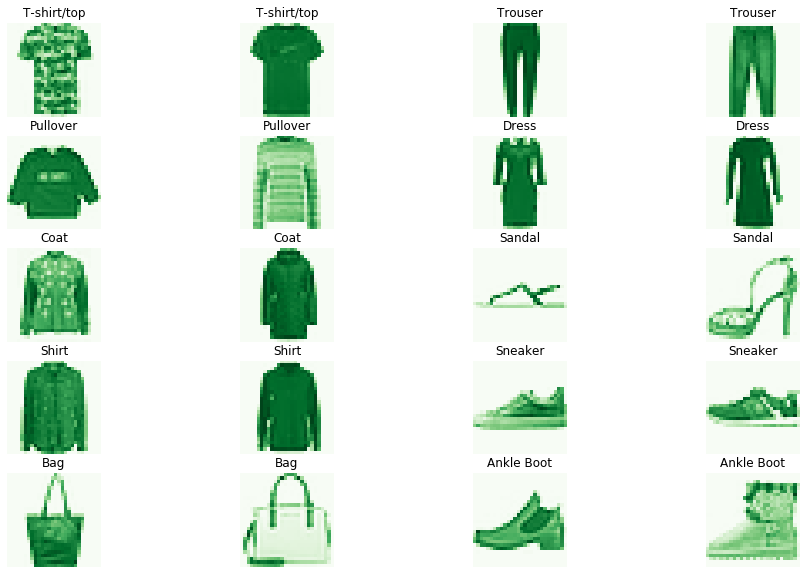

In [12]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,4, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//4, i%4].imshow(img, cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

### Test Images:

Total number of sample images to plot:  20


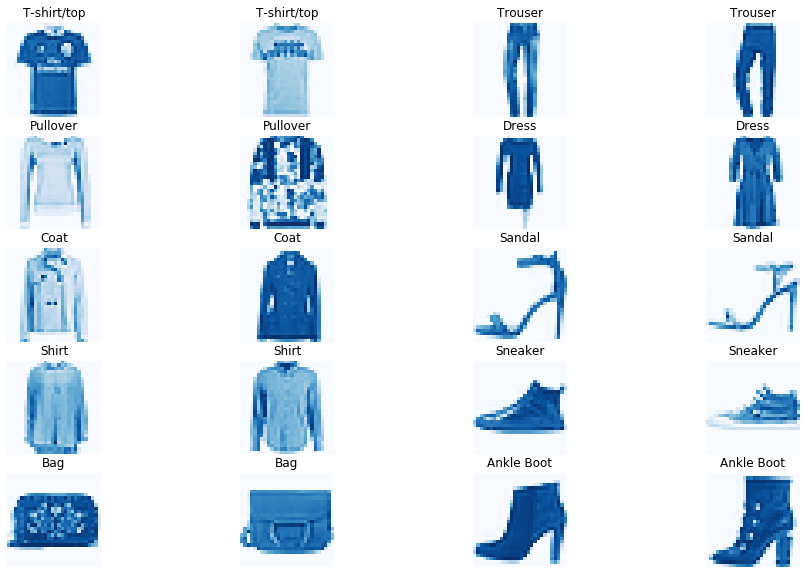

In [13]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

### **Data preprocessing:**

* Reshaping the columns from (784) to (28, 28, 1). 
* Saving label (target) feature as a separate vector.


In [14]:
# data preprocessing
def data_preprocessing(raw):
    out_y = keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255 
    return out_x, out_y

In [15]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

##### **Further splitting of train data into Train and Validation:**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


### **Sequential Model:**

*  **Conv2D: 2D Convolutional layer:**
   *  filters = 32
   *  kernel_size = (3 x 3)
   *  activation = RELU
   *  input_shape = 28 x 28 
   *  The input and output of the Conv2D is a 4D tensor


*  **MaxPooling2D is a Max pooling operation for spatial data:**
   *  pool_size = (2,2)
   *  Conv2D with the following parameters:
       *  filters: 64
       *  kernel_size : (3 x 3)
       *  activation : relu
   
   
*  **MaxPooling2D:**
   *  pool_size : (2,2)
   
   
*  **Conv2D:**
   *  filters: 128
   *  kernel_size : (3 x 3)
   *  activation : RELU
   

*  **Flatten:**

*  **Dense, fully-connected NN layer:**
   *  units = 128;
   *  activation: RELU
   

*  **Dense, output layer (fully connected):**
   *  units = 10 Classes;
   *  activation = Softmax (standard for multiclass classification)

In [17]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### **Model Summary:**

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [19]:
# plot_model(model, to_file='model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### **Training the Model:**

In [20]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 21s 436us/sample - loss: 0.5440 - acc: 0.8051 - val_loss: 0.3838 - val_acc: 0.8625
Epoch 2/50
48000/48000 [==============================] - 21s 442us/sample - loss: 0.3394 - acc: 0.8763 - val_loss: 0.3342 - val_acc: 0.8823
Epoch 3/50
48000/48000 [==============================] - 22s 452us/sample - loss: 0.2903 - acc: 0.8941 - val_loss: 0.2892 - val_acc: 0.8975
Epoch 4/50
48000/48000 [==============================] - 22s 456us/sample - loss: 0.2565 - acc: 0.9060 - val_loss: 0.2712 - val_acc: 0.9057
Epoch 5/50
48000/48000 [==============================] - 22s 457us/sample - loss: 0.2308 - acc: 0.9155 - val_loss: 0.2846 - val_acc: 0.8953
Epoch 6/50
48000/48000 [==============================] - 22s 456us/sample - loss: 0.2084 - acc: 0.9233 - val_loss: 0.2694 - val_acc: 0.9028
Epoch 7/50
48000/48000 [==============================] - 22s 455us/sample - loss: 0.1872 - acc: 0.9321 

#### **Test prediction accuracy:**

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7280124371699057
Test accuracy: 0.915


#### **Saving the Model history:**

In [25]:
import pickle
with open('fashion_mnist_model1.pkl', 'wb') as f:
    pickle.dump(train_model.history, f)
histories1 = pickle.load(open('fashion_mnist_model1.pkl', 'rb'))
#history1 = train_model.history
print(histories1.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


#### **Plot history of Accuracy and Loss:**

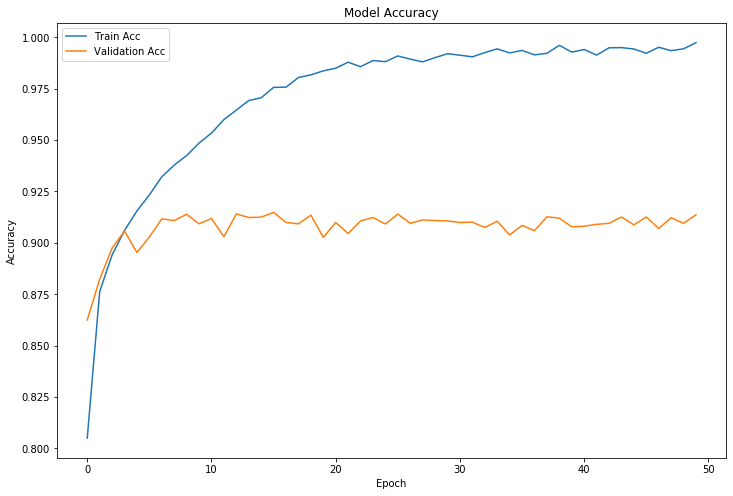

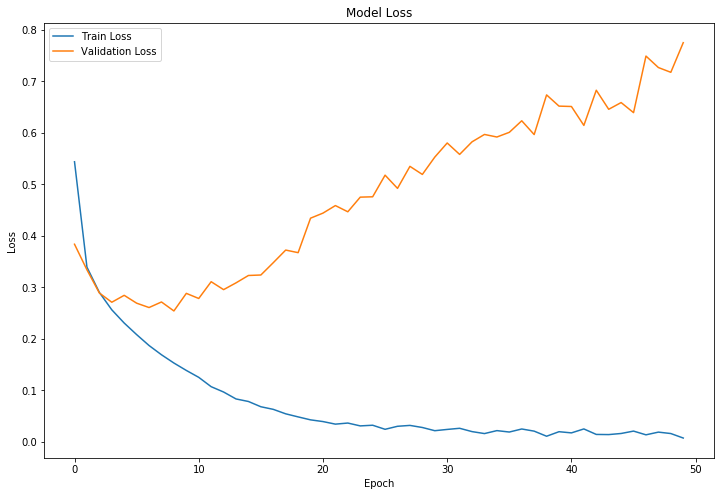

In [27]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(histories1['acc'])
plt.plot(histories1['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Acc', 'Validation Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(histories1['loss'])
plt.plot(histories1['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.show()

#### **Model is overfitting:**
*     Validation Accuracy does not increase with epochs
*     Validation Loss increases with epochs

#### **Adding dropout layers to avoid overfitting:**

In [28]:
# Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

#### **Train a new Model with dropout layers:**

In [30]:
train_model2 = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 33s 687us/sample - loss: 0.7415 - acc: 0.7247 - val_loss: 0.4461 - val_acc: 0.8331
Epoch 2/50
48000/48000 [==============================] - 33s 696us/sample - loss: 0.4658 - acc: 0.8293 - val_loss: 0.3624 - val_acc: 0.8655
Epoch 3/50
48000/48000 [==============================] - 33s 689us/sample - loss: 0.3968 - acc: 0.8539 - val_loss: 0.3245 - val_acc: 0.8814
Epoch 4/50
48000/48000 [==============================] - 33s 679us/sample - loss: 0.3594 - acc: 0.8679 - val_loss: 0.3073 - val_acc: 0.8864
Epoch 5/50
48000/48000 [==============================] - 33s 696us/sample - loss: 0.3342 - acc: 0.8772 - val_loss: 0.2870 - val_acc: 0.8969
Epoch 6/50
48000/48000 [==============================] - 33s 695us/sample - loss: 0.3187 - acc: 0.8830 - val_loss: 0.2766 - val_acc: 0.8997
Epoch 7/50
48000/48000 [==============================] - 33s 689us/sample - loss: 0.3041 - acc: 0.8876 

#### **Saving second Model:**

In [32]:
with open('fashion_mnist_model2.pkl', 'wb') as f:
    pickle.dump(train_model2.history, f)
histories2 = pickle.load(open('fashion_mnist_model2.pkl', 'rb'))

#### **Plottin Accuracy and Loss of Model2:**

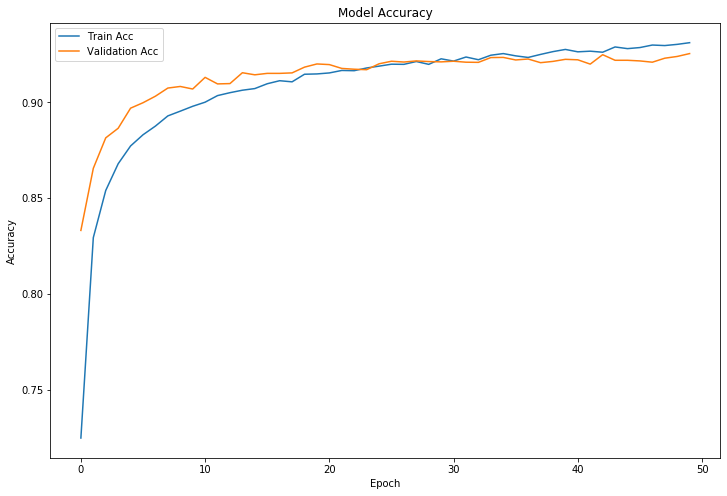

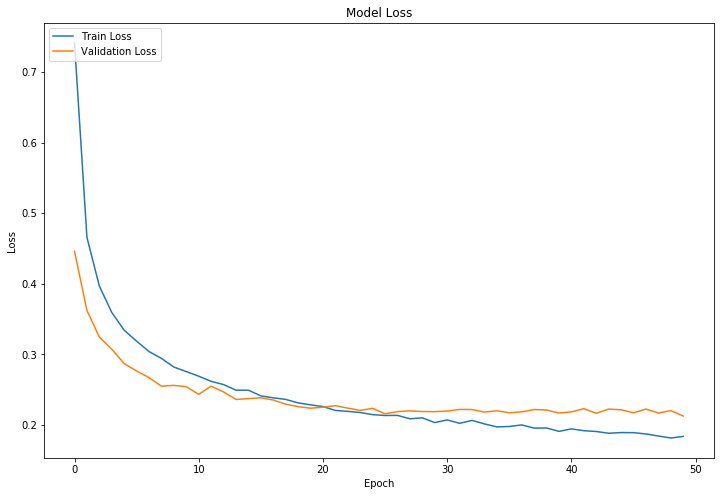

In [33]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(histories2['acc'])
plt.plot(histories2['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Acc', 'Validation Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(histories2['loss'])
plt.plot(histories2['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper left')
plt.show()

### **Acccuracy and Loss are good with dropout layers:**

#### Prediction Accuracy 

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19769491153359414
Test accuracy: 0.9303


In [35]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

In [36]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

/Users/sigmarabi1/opt/anaconda3/envs/TFlow_Py36Env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


In [37]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9303
Incorrect predicted classes: 697


In [38]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.88      0.88      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.91      0.88      0.89      1000
      Class 3 (Dress) :       0.93      0.94      0.93      1000
       Class 4 (Coat) :       0.90      0.90      0.90      1000
     Class 5 (Sandal) :       0.99      0.98      0.99      1000
      Class 6 (Shirt) :       0.79      0.81      0.80      1000
    Class 7 (Sneaker) :       0.96      0.97      0.97      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.97      0.97      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



#### The Model precision and recall metrics for class 6(Shirt) is the lowest of all. 

### **Visualizing images:**

#### Plotting sample of correct images:

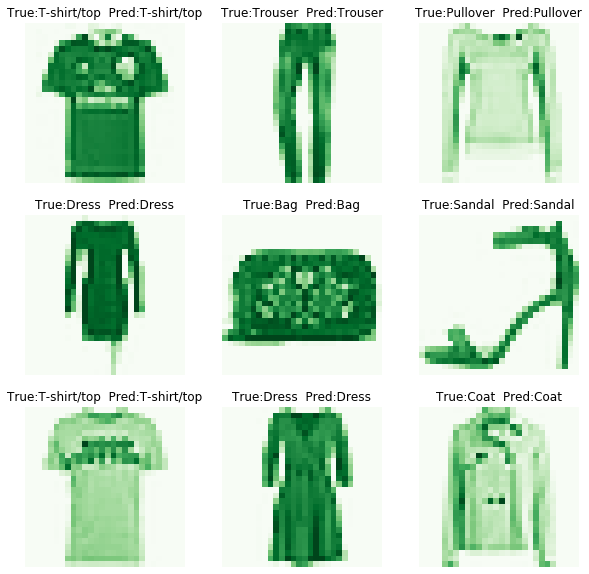

In [39]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(3,3, figsize=(10,10))

    for i, indx in enumerate(data_index[:9]):
        ax[i//3, i%3].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

#### Plotting sample of incorrect images:

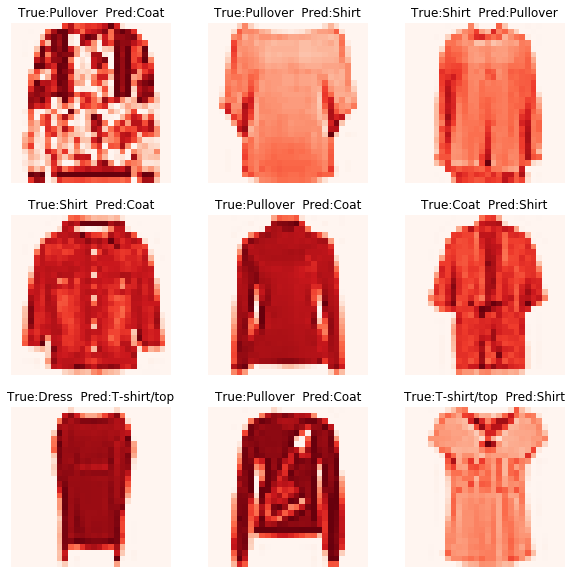

In [40]:
plot_images(incorrect, "Reds")

## The end